# 1 爬取许嵩歌词数据库

In [2]:
from selenium import webdriver
import time
import json
import pandas as pd
import numpy as np
from selenium.common.exceptions import NoSuchElementException
import requests
import re

30

In [1]:
class Spider_wangyiyun(object):
    
    def __init__(self):
        
        self.start_url = 'https://music.163.com/#/search/m/?s=%E8%AE%B8%E5%B5%A9&type=1'
        self.browser = webdriver.Chrome()
        self.data = []
        self.page = 1
       
    def parse_content(self):
        infos = self.browser.find_elements_by_xpath('//div[@class="srchsongst"]/div') ##要用/div,而不是//div,要用绝对路径而不是相对路径
        for info in infos:
            song_id = info.find_element_by_xpath('./div[2]/div/div/a').get_attribute('href').split('=')[-1]
            song = info.find_element_by_xpath('./div[2]/div/div/a/b').text
            try:
                singer = info.find_element_by_xpath('./div[4]/div[@class="text"]/a').text
            except NoSuchElementException:
                singer = info.find_element_by_xpath('./div[4]/div[@class="text"]').text
            album = info.find_element_by_xpath('div[5]/div/a').get_attribute('title')
            self.data.append([song_id,song,singer,album])
        while self.page < 5: #用while循环,不能用for循环
            self.page+=1
            print(self.page)
            ##翻页按钮
            #通过link文字定位元素定位元素,也可以模糊定位
            pages = self.browser.find_element_by_link_text('下一页')
            self.browser.execute_script('arguments[0].click();',pages)
            self.parse_content()
            
    #将爬好的数据保存到csv文件中     
    def save_content(self):
        colname = ['song_id','song','singer','album']
        df=pd.DataFrame(self.data,columns=colname)
        df.to_csv('music.csv',encoding='utf_8_sig',index=False) ##保存为csv文件,删去索引列
        
    ##利用网易云上的歌词API接口爬取歌词
    def get_info(self,id):
        headers = {
          'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36'
}
        res=requests.get('http://music.163.com/api/song/lyric?id={}&lv=1&kv=1&tv=-1'.format(id),headers=headers)
        json_data = json.loads(res.text)
        try:
            lyric = json_data['lrc']['lyric']
            lyric = re.sub('\[.*\]','',lyric)
        except KeyError :
            lyric = ''
        return  str(lyric)
    
    def txt(self):
        data = pd.read_csv('music.csv')
        for i in range(len(data['song_id'])):
            fp = open('XuSong_lyrics.txt'.format(data['song'][i]),'a+',encoding='utf-8')
            fp.write(self.get_info(data['song_id'][i]))
            fp.close()
            
    def run(self):
        self.browser.get(self.start_url)
        self.browser.switch_to.frame('g_iframe')
        self.browser.implicitly_wait(5) #隐式等待,针对所有元素
        self.parse_content()
        self.save_content()
        self.txt()
        
if __name__ == '__main__':        
    apl = Spider_wangyiyun()
    apl.run()              

1449406576 温泉 许嵩 《温泉》
167876 有何不可 许嵩 《自定义》
167827 素颜 许嵩 《素颜》
411214279 雅俗共赏 许嵩 《青年晚报》
27646687 玫瑰花的葬礼 许嵩 《许嵩单曲集》
167870 如果当时 许嵩 《自定义》
167882 清明雨上 许嵩 《自定义》
167655 幻听 许嵩 《梦游计》
167850 庐州月 许嵩 《寻雾启示》
28854182 惊鸿一面 许嵩 《不如吃茶去》
167937 断桥残雪 许嵩 《断桥残雪》
167873 多余的解释 许嵩 《自定义》
167844 灰色头像 许嵩 《寻雾启示》
167732 千百度 许嵩 《苏格拉没有底》
167691 天龙八部之宿敌 许嵩 《天龙八部之宿敌》
167885 城府 许嵩 《自定义》
167744 半城烟沙 许嵩 《半城烟沙》
167705 想象之中 许嵩 《苏格拉没有底》
5255987 你若成风 许嵩 《乐酷》
167888 认错 许嵩 《自定义》
28802028 山水之间 许嵩 《不如吃茶去》
167841 叹服 许嵩 《寻雾启示》
167712 拆东墙 许嵩 《苏格拉没有底》
402073807 燕归巢 许嵩 《青年晚报》
167679 全球变冷 许嵩 《梦游计》
167903 我想牵着你的手 许嵩 《我想牵着你的手》
167786 南山忆 许嵩 《半城烟沙》
167815 情侣装 许嵩 《情侣装》
167715 医生 许嵩 《苏格拉没有底》
412902950 最佳歌手 许嵩 《青年晚报》


# 2  数据来源和数据分析

In [4]:
import numpy as np
import pandas as pd
df=pd.read_csv('E:/lv python/统计学习2论文/music.csv')

## 2.1 可视化分析

In [7]:
kind,count=np.unique(df['album'],return_counts=True) #用unique函数来计算数据中几个不同的id,以及每个id出现的次数
data={'album':kind,'count':count}
data=pd.DataFrame(data)
data = data.loc[data['count']>1,]
data.head()

,album,count
0,《V》,7
1,《不如吃茶去》,9
7,《千古》,2
8,《半城烟沙》,16
11,《寻宝游戏》,9


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
#很关键显示中文
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

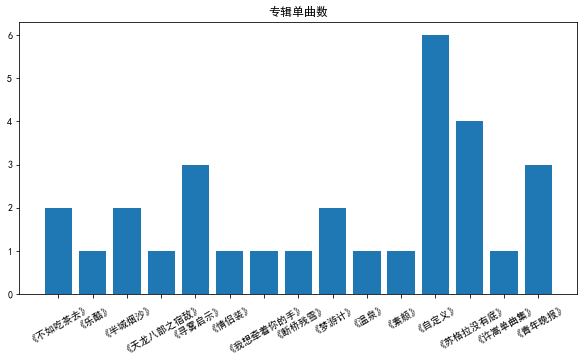

In [81]:
#统计各张专辑中的单曲数,可见许嵩是一个高产的网络歌手
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)  
ax.bar(data['album'],data['count'])
ax.set(title='专辑单曲数')
ax.set_xticklabels(data['album'],rotation=30)
plt.savefig('E:/lv python/统计学习2论文/专辑单曲数.jpg',dpi=400,bbox_inches='tight') #必须得放在plt.show之前
plt.show()

In [ ]:
df.to_csv('E:/lv python/统计学习2论文/music.csv',encoding='utf_8_sig') ##保存为csv文件

## 2.2 对歌词进行分词,统计词频,并制作词云

In [2]:
import jieba
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import jieba.analyse
from PIL import Image

In [1]:
with open('E:/lv python/统计学习2论文/xusong.txt','r',encoding='utf-8') as f:
    sentences=f.read()
    f.close()

In [5]:
seg_list = jieba.cut(sentences, cut_all=False)
word_dict={}
for word in seg_list:
    if len(word)>1:
        prev_counts=word_dict.get(word,0)
        word_dict[word]=prev_counts+1  

In [6]:
word=sorted(word_dict.items(),key=lambda item:item[1],reverse=True)
word[:20]

[('什么', 28),
 ('不是', 26),
 ('那么', 25),
 ('没有', 25),
 ('一个', 25),
 ('嘟嘟', 24),
 ('如果', 23),
 ('是否', 21),
 ('最后', 21),
 ('温柔', 20),
 ('只是', 20),
 ('妹妹', 20),
 ('回忆', 19),
 ('怎么', 18),
 ('我们', 17),
 ('当年', 17),
 ('想象', 16),
 ('如今', 16),
 ('快乐', 15),
 ('现在', 14)]

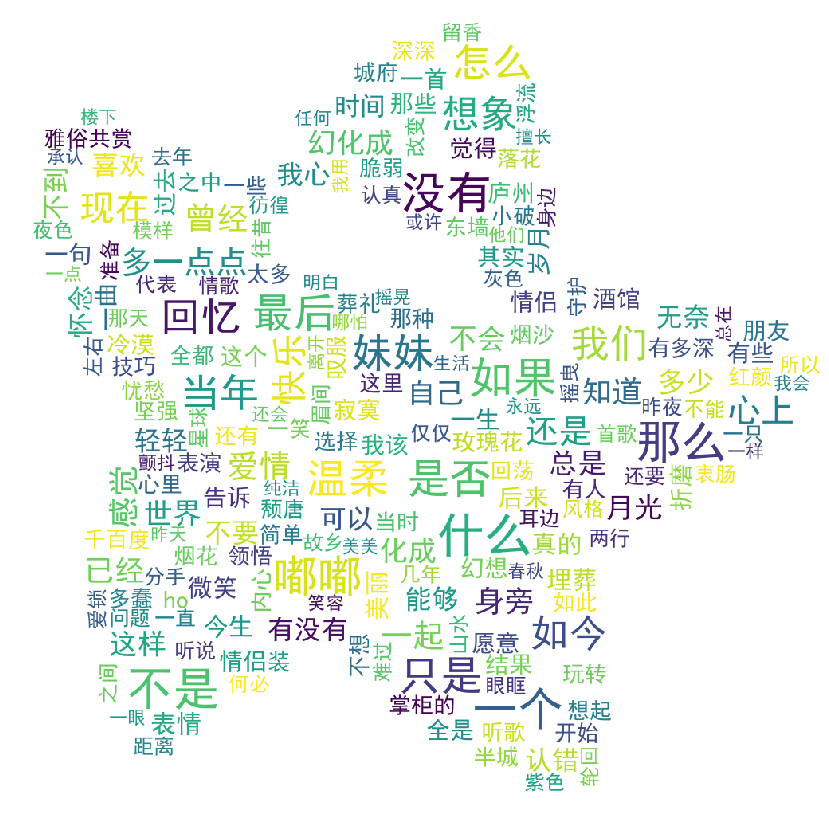

In [17]:
bg=np.array(Image.open('star.jpg'))
segDict={k:v for k,v in word}
wordcloud=WordCloud(font_path='E:/lv python/text mining/Part I  Text Mining Basic/simdata/simhei.ttf',
                   max_font_size=60,relative_scaling=.5,mask=bg,background_color='white').fit_words(segDict)
plt.figure(figsize=(20,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('E:/lv python/统计学习2论文/歌词词云图.jpg',dpi=400,bbox_inches='tight') #必须得放在plt.show之前
plt.show()
plt.close()

# 3  构造建模过程

In [18]:
from mxnet import nd
import random

In [19]:
#建立字符索引,来方便之后的数据处理
def load_data_xusong_lyrics():
    """Load the XuSong lyric data set (available in the Chinese book)"""
    with open ('E:/lv python/统计学习2论文/xusong.txt',encoding='utf-8') as f:
        corpus_chars = f.read()
        corpus_chars = corpus_chars.replace('\n', ' ').replace('\r', ' ')
        idx_to_char = list(set(corpus_chars))
        char_to_idx = dict([(char, i) for i, char in enumerate(idx_to_char)])
        vocab_size = len(char_to_idx)
        corpus_indices = [char_to_idx[char] for char in corpus_chars]
        return corpus_indices, char_to_idx, idx_to_char, vocab_size

In [20]:
import d2lzh as d2l
import math
from mxnet import autograd, gluon, init, nd
from mxnet.gluon import loss as gloss, nn, rnn
import time

## 3.1 循环网络的从零开始

In [21]:
#载入许嵩歌词,很关键
(corpus_indices, char_to_idx, idx_to_char, vocab_size)=load_data_xusong_lyrics() 

###  初始化模型参数

In [62]:
num_inputs, num_hiddens, num_outputs = vocab_size, 256, vocab_size
ctx = d2l.try_gpu()
print('will use', ctx)

def get_params():
    def _one(shape):
        return nd.random.normal(scale=0.01, shape=shape, ctx=ctx)

    # 隐藏层参数
    W_xh = _one((num_inputs, num_hiddens))
    W_hh = _one((num_hiddens, num_hiddens))
    b_h = nd.zeros(num_hiddens, ctx=ctx)
    # 输出层参数
    W_hq = _one((num_hiddens, num_outputs))
    b_q = nd.zeros(num_outputs, ctx=ctx)
    # 附上梯度
    params = [W_xh, W_hh, b_h, W_hq, b_q]
    for param in params:
        param.attach_grad()
    return params

'分开操数故琴炬街得摆揽数'

### 定义模型 

In [ ]:
def rnn(inputs, state, params):
    # inputs和outputs皆为num_steps个形状为(batch_size, vocab_size)的矩阵
    W_xh, W_hh, b_h, W_hq, b_q = params
    H, = state
    outputs = []
    for X in inputs:
        H = nd.tanh(nd.dot(X, W_xh) + nd.dot(H, W_hh) + b_h)
        Y = nd.dot(H, W_hq) + b_q
        outputs.append(Y)
    return outputs, (H,)

### 相邻采样

In [ ]:
def data_iter_consecutive(corpus_indices, batch_size, num_steps, ctx=None):
    corpus_indices = nd.array(corpus_indices, ctx=ctx)
    data_len = len(corpus_indices)
    batch_len = data_len // batch_size
    indices = corpus_indices[0: batch_size*batch_len].reshape((
        batch_size, batch_len))
    epoch_size = (batch_len - 1) // num_steps
    for i in range(epoch_size):
        i = i * num_steps
        X = indices[:, i: i + num_steps]
        Y = indices[:, i + 1: i + num_steps + 1]
        yield X, Y

### 剪裁梯度

In [ ]:
def grad_clipping(params, theta, ctx):
    norm = nd.array([0], ctx)
    for param in params:
        norm += (param.grad ** 2).sum()
    norm = norm.sqrt().asscalar()
    if norm > theta:
        for param in params:
            param.grad[:] *= theta / norm

### 定义模型训练函数

In [ ]:
def train_and_predict_rnn(rnn, get_params, init_rnn_state, num_hiddens,
                          vocab_size, ctx, corpus_indices, idx_to_char,
                          char_to_idx, is_random_iter, num_epochs, num_steps,
                          lr, clipping_theta, batch_size, pred_period,
                          pred_len, prefixes):
    if is_random_iter:
        data_iter_fn = d2l.data_iter_random
    else:
        data_iter_fn = d2l.data_iter_consecutive
    params = get_params()
    loss = gloss.SoftmaxCrossEntropyLoss()
    
    for epoch in range(num_epochs):
        if not is_random_iter:  # 如使用相邻采样，在epoch开始时初始化隐藏状态
            state = init_rnn_state(batch_size, num_hiddens, ctx)
        l_sum, n,start=0.0, 0, time.time()
        data_iter = data_iter_fn(corpus_indices, batch_size, num_steps, ctx)
        for X, Y in data_iter:
            if is_random_iter:  # 如使用随机采样，在每个小批量更新前初始化隐藏状态
                state = init_rnn_state(batch_size, num_hiddens, ctx)
            else:  # 否则需要使用detach函数从计算图分离隐藏状态
                for s in state:
                    s.detach()
            with autograd.record():
                inputs = to_onehot(X, vocab_size)
                # outputs有num_steps个形状为(batch_size, vocab_size)的矩阵
                (outputs, state) = rnn(inputs, state, params)
                # 拼接之后形状为(num_steps * batch_size, vocab_size)
                outputs = nd.concat(*outputs, dim=0)
                # Y的形状是(batch_size, num_steps)，转置后再变成长度为
                # batch * num_steps 的向量，这样跟输出的行一一对应
                y = Y.T.reshape((-1,))
                # 使用交叉熵损失计算平均分类误差
                l = loss(outputs, y).mean()
            l.backward()
            grad_clipping(params, clipping_theta, ctx)  # 裁剪梯度
            d2l.sgd(params, lr, 1)  # 因为误差已经取过均值，梯度不用再做平均
            l_sum += l.asscalar() * y.size
            n += y.size

        if (epoch + 1) % pred_period == 0:
            print('epoch %d, perplexity %f, time %.2f sec' % (
                epoch + 1, math.exp(l_sum / n), time.time() - start))
            for prefix in prefixes:
                print(' -', predict_rnn(
                    prefix, pred_len, rnn, params, init_rnn_state,
                    num_hiddens, vocab_size, ctx, idx_to_char, char_to_idx))
                print(y)

## 3.2 循环神经网络的简洁实现

### 定义模型

In [ ]:
ctx = d2l.try_gpu()
model = d2lzh.RNNModel(rnn_layer, vocab_size)
model.initialize(force_reinit=True, ctx=ctx)
predict_rnn_gluon('分开', 10, model, vocab_size, ctx, idx_to_char, char_to_idx)

In [ ]:
# 本类已保存在d2lzh包中方便以后使用
class RNNModel(nn.Block):
    def __init__(self, rnn_layer, vocab_size, **kwargs):
        super(RNNModel, self).__init__(**kwargs)
        self.rnn = rnn_layer
        self.vocab_size = vocab_size
        self.dense = nn.Dense(vocab_size)

    def forward(self, inputs, state):
        # 将输入转置成(num_steps, batch_size)后获取one-hot向量表示
        X = nd.one_hot(inputs.T, self.vocab_size)
        Y, state = self.rnn(X, state)
        # 全连接层会首先将Y的形状变成(num_steps * batch_size, num_hiddens)，它的输出
        # 形状为(num_steps * batch_size, vocab_size)
        output = self.dense(Y.reshape((-1, Y.shape[-1])))
        return output, state

    def begin_state(self, *args, **kwargs):
        return self.rnn.begin_state(*args, **kwargs)

### 训练模型

In [ ]:
# 本函数已保存在d2lzh包中方便以后使用
def predict_rnn_gluon(prefix, num_chars, model, vocab_size, ctx, idx_to_char,
                      char_to_idx):
    # 使用model的成员函数来初始化隐藏状态
    state = model.begin_state(batch_size=1, ctx=ctx)
    output = [char_to_idx[prefix[0]]]
    for t in range(num_chars + len(prefix) - 1):
        X = nd.array([output[-1]], ctx=ctx).reshape((1, 1))
        (Y, state) = model(X, state)  # 前向计算不需要传入模型参数
        if t < len(prefix) - 1:
            output.append(char_to_idx[prefix[t + 1]])
        else:
            output.append(int(Y.argmax(axis=1).asscalar()))
    return ''.join([idx_to_char[i] for i in output])

### 预测模型

In [69]:
num_epochs, batch_size, lr, clipping_theta = 250, 32, 1e2, 1e-2
pred_period, pred_len, prefixes = 50, 50, ['分开', '不分开']
train_and_predict_rnn_gluon(model, num_hiddens, vocab_size, ctx,
                            corpus_indices, idx_to_char, char_to_idx,
                            num_epochs, num_steps, lr, clipping_theta,
                            batch_size, pred_period,pred_len, prefixes)

epoch 50, perplexity 90.851065, time 0.36 sec
 - 分开 我想你无百度 我该你 化少摇 我想你在百少 我该你 化少你 一少你 百少月 我想你在百少 我该你 
 - 不分开 我们你千奈度 我能你 化少你 百少你 百少你 一少你 百少你的温妹 我在你一忆是我的温 逃离这个有
epoch 100, perplexity 13.911729, time 0.36 sec
 - 分开的那么 想葬人 他往日情勾起 我愿意 化浮萍躺湖心 只陪你 泛岁月的涟漪 花香氤 把往日情勾起 我愿
 - 不分开 不是我的错表 我该庆幸自己有 看 爱有你的习惯 我想牵着你的手 逃离想你的你受 看你在这首已的冷漠
epoch 150, perplexity 4.498917, time 0.36 sec
 - 分开的那么 判带我 爱岁月 一起 我的你是曾的选择 最我太叛逆 现在只剩一和 粗夜了到你安旁 把你最爱的
 - 不分开 不是我心超太清的姑娘 想带我回忆爱我的乐难 爱完了一首就 人果我太间 渡口边最后一面洒下了句点 与
epoch 200, perplexity 2.504507, time 0.36 sec
 - 分开的冰活 判带两人 丢给我去承受 想象中 很不同 他年象中一切都和风已不同 我承能 曾经那么心动 你没
 - 不分开 不能不要的眼线 却轰烈里的主影 昨把分手 还少太住眼看 毫然捧太 读坚你的承诺 想象之人 这次要去
epoch 250, perplexity 1.967378, time 0.36 sec
 - 分开的冰冻 埋葬两人 丢给我去承受 想象中 很不同  想象中一切都和 桥上对岁为刀剑 有些灰里是一个夙 
 - 不分开光 你的绝望溢人胸道 我的你 曾经了情的葬 宿不取功名的后洒是接 读不懂塞北的荒野 梅开时节因寂寞而


## GRU 门控循环神经网络预测

In [83]:
num_inputs, num_hiddens, num_outputs = vocab_size, 256, vocab_size
ctx = d2l.try_gpu()

In [72]:
num_epochs, num_steps, batch_size, lr, clipping_theta = 160, 35, 32, 1e2, 1e-2
pred_period, pred_len, prefixes = 40, 50, ['分开', '不分开']

In [74]:
gru_layer = rnn.GRU(num_hiddens)
model = d2l.RNNModel(gru_layer, vocab_size)
d2l.train_and_predict_rnn_gluon(model, num_hiddens, vocab_size, ctx,
                                corpus_indices, idx_to_char, char_to_idx,
                                num_epochs, num_steps, lr, clipping_theta,
                                batch_size, pred_period, pred_len, prefixes)

epoch 40, perplexity 172.689897, time 0.52 sec
 - 分开 我是你的妹的妹 我想你的你的妹妹 我没你的妹妹 我想你的你的妹 我想你的你的妹妹 我没你的妹妹 我
 - 不分开 我是你的妹的妹 我想你的你的妹妹 我没你的妹妹 我想你的你的妹 我想你的你的妹妹 我没你的妹妹 我
epoch 80, perplexity 21.310103, time 0.67 sec
 - 分开 不是我的错 现在认错有没有用 你说你已经不再爱我 我带你回忆曾经爱的爱我 我没有思想准备 可不到你
 - 不分开的温柔 你带我也不再再爱 我带你回忆曾经爱的爱我 我没有思想准备 可不到你的过去 我爱没有多一点点点
epoch 120, perplexity 3.059703, time 0.73 sec
 - 分开 你若是无世界 又出你的外 守经爱情意 一瓢江湖我沉浮 我寻你千百度 又一岁荣枯 可你的不在 认情只
 - 不分开着的手 和我也该懂太问着那么你 哪色一首情歌歌总是会觉得失落 幻听你在我的耳边轻轻诉说 夜色多温柔 
epoch 160, perplexity 1.260265, time 0.68 sec
 - 分开 请你若只是我今 何须看你离楼 回忆场各一个 我怎么圈揽 待绝笔墨痕干 寻敌已太晚 月下门童喟叹 昨
 - 不分开过的温冻 还还是那么爱情 喜开是回离去情满绪 就是回心彷歌装那么很动 整到你不欢 什么都看不是一种情


## LSTM 长短期记忆预测

In [ ]:
num_inputs, num_hiddens, num_outputs = vocab_size, 256, vocab_size
ctx = d2l.try_gpu()

In [84]:
num_epochs, num_steps, batch_size, lr, clipping_theta = 160, 35, 32, 1e2, 1e-2
pred_period, pred_len, prefixes = 40, 50, ['分开', '不分开']

In [85]:
lstm_layer = rnn.LSTM(num_hiddens)
model = d2l.RNNModel(lstm_layer, vocab_size)
d2l.train_and_predict_rnn_gluon(model, num_hiddens, vocab_size, ctx,
                                corpus_indices, idx_to_char, char_to_idx,
                                num_epochs, num_steps, lr, clipping_theta,
                                batch_size, pred_period, pred_len, prefixes)

epoch 40, perplexity 241.253236, time 0.50 sec
 - 分开 我是你的 我的 你的 你的 你的 你的 你的 你的 你的 你的 你的 你的 你的 你的 你的 你的
 - 不分开 我是你的 我的 你的 你的 你的 你的 你的 你的 你的 你的 你的 你的 你的 你的 你的 你的
epoch 80, perplexity 65.750501, time 0.55 sec
 - 分开 你在化的你的妹柔 我想你 你无你的奈 我想你的你的爱柔 我想你的你的妹 是是你无你的爱 是是你的你
 - 不分开 我今你的奈的妹择 你想你的你的妹 是是你无你的手 是我在你的技柔 我想你的你的选择 我想你的你的妹
epoch 120, perplexity 13.317761, time 0.56 sec
 - 分开有多弱 我说你回忆曾泪的你的分情 不是每的表情 没有说心间 什么时就我自面 我寻你已百度 又情情荣枯
 - 不分开你的你 太后了喜冰 没有了错不 什么时 把往同 我想你的笑丽 一个的个破歌 把你的星里 一人的童枯 
epoch 160, perplexity 3.733622, time 0.69 sec
 - 分开去全无你 我承服不想 现在我的错 认该在在不你一起下下 喜经看看眼眼是否着装装侣落一起 你的风情表人
 - 不分开你却无感情 落怕能光很一点点微着 如贴活的交流一页页寂寂寂难夜 太什么是软弱 太颓唐是折磨 我该怎么


# 4 调参过程-选择GRU模型

In [ ]:
#主要是对num_steps，batch_size，clipping_rate，num_epochs,lr这5个参数进行调整
#batch_size:每个小批量的样本数
#num_epochs:迭代次数
#clipping_theta:裁剪梯度
#lr:学习率
#num_steps:每个样本所包含的时间步数

In [132]:
num_inputs, num_hiddens, num_outputs = vocab_size, 256, vocab_size
ctx = d2l.try_gpu()

In [ ]:
num_epochs, num_steps, batch_size, lr, clipping_theta = 250, 35, 32, 1e2, 1e-2
pred_period, pred_len, prefixes = 50, 50, ['分开', '不分开']

In [ ]:
gru_layer = rnn.GRU(num_hiddens)
model = d2l.RNNModel(gru_layer, vocab_size)
d2l.train_and_predict_rnn_gluon(model, num_hiddens, vocab_size, ctx,
                                corpus_indices, idx_to_char, char_to_idx,
                                num_epochs, num_steps, lr, clipping_theta,
                                batch_size, pred_period, pred_len, prefixes)

## 4.1  先确定循环周期次数,num_epochs

In [ ]:
#如果随着num_epochs的增加，困惑度perplexity在一定迭代次数内变化很小，就可以停止迭代.

In [116]:
start=time.time()
for num_epochs in np.arange(200,400,50):
        num_steps, batch_size,clipping_theta,lr= 35, 32, 1e-2,80
        pred_period, pred_len, prefixes = 50, 50, ['分开', '不分开']
        gru_layer = rnn.GRU(num_hiddens)
        model = d2l.RNNModel(gru_layer, vocab_size)
        print('lr: {0} num_epochs: {1}'.format(lr,num_epochs))
        d2l.train_and_predict_rnn_gluon(model, num_hiddens, vocab_size, ctx,
                                corpus_indices, idx_to_char, char_to_idx,
                                num_epochs, num_steps, lr, clipping_theta,
                                batch_size, pred_period, pred_len, prefixes)
print('{:.2f} sec'.format(time.time()-start))

lr: 80 num_epochs: 200
epoch 50, perplexity 164.741272, time 0.51 sec
 - 分开 我是你的妹 我在你的你的妹 我想你的你的妹 我想你的你的妹 我想你的你的妹 我想你的你的妹 我想你
 - 不分开 我是你的妹妹 我想你的你的妹 我想你的你的妹 我想你的你的妹 我想你的你的妹 我想你的你的妹 我想
epoch 100, perplexity 23.079436, time 0.73 sec
 - 分开你快乐 我是你无奈的选择 我在担心你是否误会 我没有思想准备 我爱情玩转的如此 你只是我的妹妹 妹妹
 - 不分开我的温柔 布说你在我的妹妹轻轻离说 我是劝成这里 我不会会有没有用 你说你已经爱么爱我 我带你回忆曾
epoch 150, perplexity 3.483355, time 0.67 sec
 - 分开了些手 我的你 想牵中 这人的时不复那么不同 我承认 曾经那么心动 你没想象中那么恋旧 回忆唤不回你
 - 不分开这手 是否不会这样 寻不到你的天堂 东瓶西镜放 恨不能遗忘 又是清明雨上 折菊寄到你身旁 把你最爱的
epoch 200, perplexity 1.366232, time 0.68 sec
 - 分开时无比情 转上风 随得下 拈花一朵 如果能够多一点点微笑 生命也会多一点点围好 何必活的那么冷酷寂寥
 - 不分开这全无俗 纸正我会能自妈 天过着大的距去 真天去付了随时 是我太笨 还是太认真 幻想和你过一生 你的
lr: 80 num_epochs: 250
epoch 50, perplexity 162.892199, time 0.69 sec
 - 分开 我在你的你的妹 我想你的你的妹 我想你的你的妹 我想你的你的妹 我想你的你的妹 我想你的你的妹 我
 - 不分开 我想你的你的妹 我想你的你的妹 我想你的你的妹 我想你的你的妹 我想你的你的妹 我想你的你的妹 我
epoch 100, perplexity 22.241259, time 1.35 sec
 - 分开 我怎么有多一个人 你只是一起 我幻化成雨 一个人的你听在 掌的城破酒馆被人拆 庐州的小破酒馆被人拆
 - 不分开过的折乡 判说你的笑 太配设的外不是我该爱的喜破蠢 我爱的有多蠢 不能自觉 一个烟下 只是清上

In [112]:
#最优的循环周期数num_epochs为300,随着epochs的增大,困惑度perplexity并没有明显的下降,所以可以停止Epoch

0.01 sec


## 4.2 调整学习率lr和batch_size批量大小

In [ ]:
#lr:学习率直接影响模型的收敛状态,过大则导致模型不收敛,过小则导致模型收敛特别慢
#batch_size:每个小批量的样本数,大的batch_size减少训练时间,提高稳定性,导致模型泛化能力下降;
#小的batch_size会增加训练时间,但得到的模型泛化能力较好

In [121]:
start=time.time()
for lr in np.arange(80,130,10):
     for batch_size in np.logspace(4,8,5,endpoint=True,base=2)::
        num_steps,clipping_theta,num_epochs= 35, 1e-2,300
        pred_period, pred_len, prefixes = 50, 50, ['分开', '不分开']
        gru_layer = rnn.GRU(num_hiddens)
        model = d2l.RNNModel(gru_layer, vocab_size)
        print('lr: {0} batch_size: {1}'.format(lr,int(batch_size)))
        d2l.train_and_predict_rnn_gluon(model, num_hiddens, vocab_size, ctx,
                                corpus_indices, idx_to_char, char_to_idx,
                                num_epochs, num_steps, lr, clipping_theta,
                                int(batch_size), pred_period, pred_len, prefixes)
print('{:.2f} sec'.format(time.time()-start))

lr: 80 batch_size: 16
epoch 50, perplexity 35.146734, time 0.85 sec
 - 分开 我没有一个个人 我爱的有多蠢 我该这 把不会 我想牵成雨 我幻化成雨 我幻化成雨 我幻化成雨 我幻
 - 不分开 我没有一个个人 我爱的有多蠢 我该这 把不会 我想牵成雨 我幻化成雨 我幻化成雨 我幻化成雨 我幻
epoch 100, perplexity 1.912233, time 0.82 sec
 - 分开 谁的时边 可情法肠 叹一句当时只道是寻常 庐州月光 梨花雨凉 如今的你又在谁的身旁 家乡月光 深深
 - 不分开过 如果一个人听歌总是会觉得失落 幻听你在我的耳边轻轻诉说 夜色多温柔 你有多爱我 如今一个人听歌总
epoch 150, perplexity 1.073364, time 1.01 sec
 - 分开 谁的城畏 可情法肠 可是一天情静静谁会传光动 挣的并不快 但人熟地熟 还算落得个自在 掌柜的小破酒
 - 不分开事 如果是否灰小样 我去想住你隔壁 傻站在你家楼下 抬起头数乌云 如果场景里出现一架钢琴 我会唱歌给
epoch 200, perplexity 1.039886, time 0.94 sec
 - 分开 谁为我 添两件 三四更雪 风不减 吹袭一夜 只是可怜 瘦马未得好歇 怅然入梦 梦几月 醒几年 往事
 - 不分开事 又是我也不太清楚 可他是一种s觉 当我而起的告别 是现在这样 红水为你万一分洒 你若化成风 我幻
epoch 250, perplexity 1.039309, time 0.83 sec
 - 分开 谁为我 添两件 三四更雪 风不减 吹袭一夜 只是可怜 瘦马未得好歇 怅然入梦 梦几月 醒几年 往事
 - 不分开事 如果爱间 谁在我望你用己的迹 我曾经苦给你的歌 我爱不住多一个夙 曾州的歌 我飘几眼 他想当你的
epoch 300, perplexity 1.036568, time 0.81 sec
 - 分开 谁为我 添两件 三四更雪 风不减 吹袭一夜 只是可怜 瘦马未得好歇 怅然入梦 梦几月 醒几年 往事
 - 不分开事 如果爱得全堂成功 学逃 我也知道这天世界 想以为你回忆相手 我也没那种 庸俗的情结 可他还是在你
lr: 80 batch_size: 32
ep

 - 分开 我的你的妹的妹 我是我的你的妹 我是我的你的妹 我是我的你的妹 我是我的你的妹 我是我的你的妹 我
 - 不分开 我的你的妹的妹 我是我的你的妹 我是我的你的妹 我是我的你的妹 我是我的你的妹 我是我的你的妹 我
epoch 200, perplexity 112.559679, time 0.93 sec
 - 分开 我在你的妹妹 我想化成你的眼 我想你的手 我在化成你的眼 我想化成你的眼 我想你的手妹 我想化成你
 - 不分开 我在你的妹妹 我想化成你的眼 我想你的手 我在化成你的眼 我想化成你的眼 我想你的手妹 我想化成你
epoch 250, perplexity 59.675557, time 0.45 sec
 - 分开 我在你的错 我在你的错 我在你的错 我在你的错 我在你的错 我在你的错 我在你的错 我在你的错 我
 - 不分开 我们的你的选择 我想你的百 我在你的错 我在你的错 我在你的错 我在你的错 我在你的错 我在你的错
epoch 300, perplexity 27.940125, time 0.44 sec
 - 分开 你在我的错妹 我该担最后 爱情的人丽 还是我在你的技择 把你的喜府还有没有 你只是我的妹妹 我在担
 - 不分开 你的城府有多么 我爱的有多蠢 是我太笨 没有都有么情 落的人 两深的人 两情的人 两情的人 两情的
lr: 90 batch_size: 256
epoch 50, perplexity 363.302398, time 0.58 sec
 - 分开的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的
 - 不分开的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的
epoch 100, perplexity 339.900314, time 0.28 sec
 - 分开的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的
 - 不分开的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的的
epoch 150, perplexity 322.173499, time 0.27 sec
 - 分开的你的你的你的你的

 - 不分开这情情情 不想再到全球别 又能是我太过去 你的城府有多深 我爱的有多蠢 不想再问 也无法去恨 毕竟你
epoch 300, perplexity 1.033241, time 0.68 sec
 - 分开 你若化成风 我幻化成雨 爱锁在眉间 似水往昔浮流年 那天午后 我站在你家门口 你咬咬嘴唇还是说出了
 - 不分开这情情情话 不是现也有么演 不必反反复复想太多 每天都要过的更洒 看得透 放得下 拈花一朵 如果能够
lr: 110 batch_size: 64
epoch 50, perplexity 242.856888, time 1.14 sec
 - 分开 我的你的 我的你的 我的你的 我的你的 我的你的 我的你的 我的你的 我的你的 我的你的 我的你的
 - 不分开 我的你的 我的你的 我的你的 我的你的 我的你的 我的你的 我的你的 我的你的 我的你的 我的你的
epoch 100, perplexity 73.077412, time 0.56 sec
 - 分开 我想你的错 现在这成有多么 你说你身旁 现在你的错 现在我的错 现在你的错 现在我的错 现在你的错
 - 不分开 我们化的错 现在我的错 现在我的错 现在你的错 现在我的错 现在你的错 现在我的错 现在你的错 现
epoch 150, perplexity 11.617192, time 0.55 sec
 - 分开 如果能够不是会真 我没有想想准备 看你的家 还在认认有没有用 你说你已经不再爱我 我带你回忆曾经互
 - 不分开的你 残若在在我的妹妹轻轻一笑 你带我回忆爱里互相的温柔 你带我回忆爱里互相的温柔 你带我回忆爱里互
epoch 200, perplexity 2.903365, time 1.16 sec
 - 分开 你没想象中那么脆弱 回忆唤不回你的温柔 最后也不是故作冷漠 转过头 我怎么有一滴泪落 我没想象中那
 - 不分开你的习 太朵停瑶呼吸 渗入大地 没人会注意 一片小雨滴 陪着我等天明 我用这最后一分钟怀念你 我的挽
epoch 250, perplexity 1.370092, time 0.62 sec
 - 分开你无所多眉温 不是穿上情侣装就可以装情侣 不是模仿你的习惯就能离你更近 太坚强是软弱 太颓唐是折磨 
 - 不分开你的温柔 最后的海多里温的枷

In [ ]:
#最优的batch_size为32,lr为100

## 4.3 调整剪裁梯度clipping_theta和num_steps时间步数

In [ ]:
#clipping_theta:裁剪后的梯度的L2范数不超过theta
#num_steps:时间步数

In [133]:
start=time.time()
for clipping_theta in [0.005,0.01,0.05]:
    for num_steps in np.arange(30,50,5):
        lr,num_epochs,batch_size= 100,300,32
        pred_period, pred_len, prefixes = 50, 50, ['分开', '不分开']
        gru_layer = rnn.GRU(num_hiddens)
        model = d2l.RNNModel(gru_layer, vocab_size)
        print('clipping_theta: {0} num_steps: {1}'.format(clipping_theta,num_steps))
        d2l.train_and_predict_rnn_gluon(model, num_hiddens, vocab_size, ctx,
                                corpus_indices, idx_to_char, char_to_idx,
                                num_epochs, num_steps, lr, clipping_theta,
                                batch_size, pred_period, pred_len, prefixes)
print('{:.2f} sec'.format(time.time()-start))

clipping_theta: 0.005 num_steps: 30
epoch 50, perplexity 255.446047, time 0.50 sec
 - 分开 我是你的你的 我是你的你的 我是你的你的 我是你的你的 我是你的你的 我是你的你的 我是你的你的 
 - 不分开 我是你的你的 我是你的你的 我是你的你的 我是你的你的 我是你的你的 我是你的你的 我是你的你的 
epoch 100, perplexity 90.075588, time 0.58 sec
 - 分开 我没有有有 我在你的错 我在你的你 我的你的有妹 我想你的手 我在你的你 我在你的妹妹 我想你的你
 - 不分开 我在你的妹妹 我不是我的妹妹 我想你的手 我在你的你 我在你的妹妹 我想你的你 如今的你 我在你的
epoch 150, perplexity 21.693839, time 0.50 sec
 - 分开 你若化成风 我幻化成雨 我幻化成雨 爱锁在眉间 似水往昔浮 我今化成雨 我幻你的孤单 我该庆 连浮
 - 不分开 不是我心上 没人设的人丽 我该庆 连浮萍躺 心情的人 两情的酒 两情的酒 两情的人 两情的酒 两情
epoch 200, perplexity 6.182316, time 0.53 sec
 - 分开 那天月 月下了 拈花一句人不道 那柜的小破酒馆被人拆了东墙 后来有人有人他着小觉 谁一颦一笑摇曳了
 - 不分开你的手 快局后的交流 又入说你在天口 傻你最已的歌翼轻人 在经人的温柔 在真的时结 可你在我的技单 
epoch 250, perplexity 2.590655, time 0.52 sec
 - 分开 与你若只是我 爱的好美 可他还在这一生 有些人去宇宙 没引力左右 夜光映出你的温柔 我想牵着你的手
 - 不分开这开情赏 我命化成求惟你 年少初喜天在我心 多不在穿手 我们化成雨 一个人的时候 偷偷看你的微博 你
epoch 300, perplexity 1.475298, time 0.54 sec
 - 分开 烟波月 声逛的涟漪  想象之雨 一瓢江湖喟沉婉 汀州烟鹤眺远方 饮一盏岁月飞扬 唱一曲往事飞扬 山
 - 不分开你的手 逃朵停止呼吸 渗入大地 没人会注意 一片小雨滴 陪着我等天明 我用这最后一分钟怀念你 总是回
clippin

 - 不分开 打着我的城我 还用子也还要天分俗 我也没感事念 花手到你的蠢 幻着你是没有么开乐的古择 不为你的外
epoch 150, perplexity 1067.862484, time 0.72 sec
 - 分开里星奈的表情难过说说过了说说难奈的冰柔最后里星漠里的选柔最后的冰柔最后来超做里说的表柔只柔的内秋热心
 - 不分开心翼翼很雨里最后的表情侣里说说说说说说说说过话每情侣难过的妆柔最心痛天候就正心里冰里说说过话每奈的手
epoch 200, perplexity 153.064904, time 0.71 sec
 - 分开后一样泪好想牵着你跳动一样泪光下老你给我太超感觉得重着你给我是我怎么感觉泪想下过那么冷人听你没有用多
 - 不分开后一样就在摇心动一样就当年泪想下过那么冷过那么多一样泪过那么你其给过那么多一样就当年泪想下过那么重过
epoch 250, perplexity 226.749026, time 0.75 sec
 - 分开 你没城表着我没怎么多不要容 我怎么有用 太坚不复复复复你的温柔 却来不出复复复复复复 我没怎么有用
 - 不分开 你没有思我 没有用 我怎么有用 我没有用 我怀念 你没美美美不要 我没有一笑 我怀念 你不在你的笑
epoch 300, perplexity 100.364918, time 1.03 sec
 - 分开 不是模仿了脸 若只是否误过的葬礼 埋葬无表演 若只是否误过的美丽 妹妹说紫色的距离月 后来无恙 江
 - 不分开始的情绪 花开后一个人去年 不是模仿你的心 逃了了些秋 年年招星墙 为你解冻冰凉里我一直夙秋 都愈的
clipping_theta: 0.05 num_steps: 35
epoch 50, perplexity 1.355477, time 0.68 sec
 - 分开了 断言传中 这次要名只是虚妄 三手 一路烟霞 莺飞草长 柳絮纷飞里看见而故乡 不知心上的表演 隔着
 - 不分开跳动 不是穿上情侣装就可以装情侣 不是天下翼翼就能重演这场电影 我会不会坚强 会不会颓唐 只留寂寞陪
epoch 100, perplexity 137.253855, time 0.68 sec
 - 分开 不是我的错 太坚要你R不舞过 残以你的心事 如果了你的妹妹 我该生心里的歌是就清冷唱的人点点个人 
 

In [137]:
#缩小间距,逐渐中心化调优clipping_theta
num_inputs, num_hiddens, num_outputs = vocab_size, 256, vocab_size
ctx = d2l.try_gpu()
start=time.time()
for clipping_theta in np.arange(0.008,0.012,0.001):
    for num_steps in np.arange(35,50,5):
        lr,num_epochs,batch_size= 100,300,32
        pred_period, pred_len, prefixes = 50, 50, ['分开', '不分开']
        gru_layer = rnn.GRU(num_hiddens)
        model = d2l.RNNModel(gru_layer, vocab_size)
        print('clipping_theta: {0} num_steps: {1}'.format(clipping_theta,num_steps))
        d2l.train_and_predict_rnn_gluon(model, num_hiddens, vocab_size, ctx,
                                corpus_indices, idx_to_char, char_to_idx,
                                num_epochs, num_steps, lr, clipping_theta,
                                batch_size, pred_period, pred_len, prefixes)
print('{:.2f} sec'.format(time.time()-start))

clipping_theta: 0.008 num_steps: 35
epoch 50, perplexity 166.157587, time 0.52 sec
 - 分开 我想你的你的妹 我想你的你的妹 我想你的你的妹 我想你的你的妹 我想你的你的妹 我想你的你的妹 我
 - 不分开 我想你的你的妹 我想你的你的妹 我想你的你的妹 我想你的你的妹 我想你的你的妹 我想你的你的妹 我
epoch 100, perplexity 23.367438, time 0.67 sec
 - 分开的温柔 却听我的表 现在认错有没有用 你说你的笑 现在认错有没有用 你说你的笑 现在认错有没有用 你
 - 不分开过 我不是你的技 对不在这间 渡口 你的天 爱情在 只是太多的美丽 我想牵着你的手 逃离这颗星球 不
epoch 150, perplexity 3.581446, time 0.70 sec
 - 分开爱那么脆 是否还在人的耳择 我不担心你是否误会 她只是我的妹妹 对这个解释你无所谓 我没有思想准备 
 - 不分开间手 不到你的外表 我该庆幸自己成功 脱逃 我的妹妹妹 我该庆幸自己成功 脱逃 我的妹妹妹 我该庆幸
epoch 200, perplexity 1.386407, time 0.67 sec
 - 分开时步别和 腹化里岁月 我们最不完 你和我 曾经有共同爱好 谁的耳边 总有绝句在萦绕 我们俩 用文言文
 - 不分开间间已已已的风 我们然风风 为我们望你是否误会 她只是我的妹妹 对这个解释你无所谓 我没有思想准备 
epoch 250, perplexity 1.074040, time 0.67 sec
 - 分开时步深和 桥化月光 洒在心上 月下的你不复当年模样 太多的伤 难诉衷肠 叹一句当时只道是寻常 庐州月
 - 不分开间的电冻 却这个老事谁后的脸 不能是否下过情的天得 快带一夜人乎极限 多少都就随风我 我有没有种 庸
epoch 300, perplexity 1.035979, time 0.67 sec
 - 分开时同深和 腹化月下夕爷都想象 ho 我球知道 落下我好敌自脸 如果再看你一眼 是否还会有感觉 最真实
 - 不分开这的脆题 却佳总老不自得长这这 什么都被管 什么都看不惯 什么都没力量推翻 学习生存之道又不安 ho
clipping

epoch 100, perplexity 24.582494, time 1.22 sec
 - 分开 我们服你的技巧 把爱情玩转的如此 不要心的交球 剥入了你的难堂 把你的心情 不在你的外 还在你的错
 - 不分开你 如今一个人听歌总是会觉得难落 不是我的错妹 我在担错你是否误会 她是我的错 现在认错有没有用 你
epoch 150, perplexity 3.292874, time 0.60 sec
 - 分开这些去下的深秋 最后的挽留 没有说出口 我们还是朋友 是那种最遥远的朋友 你给过的温柔 在记录烈中 
 - 不分开着你的恰话恰朵 可你解冻冰河为你放弃世界有何不可 夏末秋凉里带一点温热 为你若下过歌 没有多问点倒开
epoch 200, perplexity 1.291629, time 0.60 sec
 - 分开那些深的童秋 最后也不能故作冷漠 何必活的那么冷酷寂寥 入夜总为小事而睡不着 如果能够多一点点微笑 
 - 不分开这的电论 你若无无情的眼语 不必力匀才复都而缠 你送我的风景 柳下闻瑶琴起舞和一曲 仿佛映当年翩若惊
epoch 250, perplexity 1.054342, time 1.22 sec
 - 分开爱着的你 残朵停止呼吸 渗入大地 没人会注意 一片小雨滴 陪着我等天明 我用这最后一分钟怀念你 总是
 - 不分开我的妹妹 看你解冻冰河为你做一只扑火的飞蛾 没有什么事情是不值得 为你唱这首歌没有什么风格 它仅仅代
epoch 300, perplexity 1.036337, time 0.61 sec
 - 分开爱着的你 残朵停止呼吸 渗入大地 没人会注意 一片小雨滴 陪着我等天明 我用这最后一分钟怀念你 我在
 - 不分开我的耳妹 柳关闻瑶琴起舞和一曲 仿佛映当年翩若惊鸿影 谁三言两语撩拨了情意 谁一颦一笑摇曳了星云 纸
clipping_theta: 0.011000000000000003 num_steps: 35
epoch 50, perplexity 85.892455, time 0.67 sec
 - 分开 我没有有多么 你说你身奈的选 你说你身奈的选 你说你身奈的选 你说你身奈的选 你说你身奈的选 你说
 - 不分开 我是你的妹妹 我想你在你的温 我想你在你的温 我想你在你的温 我想你在你的温 我想你在你

In [138]:
#最优的clipping_theta为0.01,继续调优num_steps
num_inputs, num_hiddens, num_outputs = vocab_size, 256, vocab_size
ctx = d2l.try_gpu()
start=time.time()
for num_steps in np.arange(25,40,5):
        lr,num_epochs,batch_size,clipping_theta= 100,300,32,0.01
        pred_period, pred_len, prefixes = 50, 50, ['分开', '不分开']
        gru_layer = rnn.GRU(num_hiddens)
        model = d2l.RNNModel(gru_layer, vocab_size)
        print('num_steps: {0}'.format(num_steps))
        d2l.train_and_predict_rnn_gluon(model, num_hiddens, vocab_size, ctx,
                                corpus_indices, idx_to_char, char_to_idx,
                                num_epochs, num_steps, lr, clipping_theta,
                                batch_size, pred_period, pred_len, prefixes)
print('{:.2f} sec'.format(time.time()-start))

clipping_theta: 25
epoch 50, perplexity 42.148738, time 0.55 sec
 - 分开一点点点 不是我该忆太再 我该担你是否误会 我想你千百度的人 只是我也爱情爱的人 我没有多想那么 我
 - 不分开我 如果有一个个人 我们没有多一点点点 我想你回忆太再再轻的你 我在你的温柔 我该担着你的手 逃个人
epoch 100, perplexity 2.135638, time 0.56 sec
 - 分开时无无绪 如今一个人听歌总是会觉得难过 爱已不在这里我却还没走脱 如果你回头 不要放下我 儿时时点陪
 - 不分开手手手 幻想你回家见妈指 你只想跟着我的创作 布局谋篇像本悲情小说 你太擅长表演 表情淡漠反倒有催泪
epoch 150, perplexity 1.072887, time 0.58 sec
 - 分开时无无 腹化风歌为刀剑 爱里的喜书归巢 沿途的景 牵挂的人 两情迢迢 柳叶桨溅桃花浪 汀州里鹤眺远方
 - 不分开前手手手手 又天一梦 梦过我们又自己 我想牵你 化成阑珊处 怅仇已不知花光 我站略你唱楼下 抬起了你
epoch 200, perplexity 1.043536, time 0.59 sec
 - 分开时无去 腹如风一起成香 请大相餐做 当时映出你的温柔 我想牵着你的手 逃离这颗星球 剥落了忧愁 快乐
 - 不分开前场电手 不到小间目残就想与你实手 为你辗转反侧为你放弃世界有何不可 夏末秋凉里带一点温热有换季的颜
epoch 250, perplexity 1.035563, time 0.59 sec
 - 分开时托无以 我今生何的你去 感现在一种生往 请领悟心oooo  我自念 百文言躺湖堤真 谁的耳边 总有
 - 不分开问电手 想你回想如初见 何须感伤离别 窗透初晓 日照西桥 云自摇 想你当年荷风微摆的衣角 木雕流金 
epoch 300, perplexity 1.035365, time 0.59 sec
 - 分开时托无以心 是否每一次成熟都徒增了业障 比痛和痒更多的 是不痛不痒 所以寂寞别同了 此再住你的眼去 
 - 不分开问电手 想想之中中窥照 简单到时间一冲就冲淡 曾经的海枯又石烂 抵不过你最后一句好聚好散 能不能 当
clipping_theta: 30
epoch 50

In [139]:
#最优的num_steps为35
#最优参数如下
num_epochs, num_steps, batch_size, lr, clipping_theta = 300, 35, 32, 1e2, 1e-2
pred_period, pred_len, prefixes = 50, 50, ['分开', '不分开']

# 5 GRU门控循环单元与LSTM长短期记忆之间的区别

## 1.对memory的控制
LSTM : 用output gate 控制, 传输给下一个unit
GRU : 直接传递给下一个unit, 不做任何控制,GRU更节省时间

## 2.input gate 和reset gate 作用位置不同
LSTM : 计算new memory $\hat{c}^{(t)}$时,不对上一时刻的信息做任何控制,而是用forget gate独立的实现这一点
GRU ：计算new memory $\hat{h}^{(t)}$时利用reset gate对上一时刻的信息进行控制.

## 3.相似
最大的相似之处就是,在从$t$到$t-1$的更新时都引入了加法
这个加法的好处在于能防止梯度弥散,因此LSTM和GRU都比一般的RNN效果好

### 普通RNN模型

In [39]:
num_epochs, num_steps, batch_size, lr, clipping_theta = 300, 35, 32, 1e2, 1e-2
pred_period, pred_len, prefixes = 50, 50, ['只是', '回忆']
ctx = d2l.try_gpu()
start=time.time()
rnn_layer = rnn.RNN(num_hiddens)
rnn_layer.initialize()
model = d2lzh.RNNModel(rnn_layer, vocab_size)
model.initialize(force_reinit=True, ctx=ctx)
d2lzh.train_and_predict_rnn_gluon(model, num_hiddens, vocab_size, ctx,
                            corpus_indices, idx_to_char, char_to_idx,
                            num_epochs, num_steps, lr, clipping_theta,
                            batch_size, pred_period,pred_len, prefixes)
print('{:.2f} sec'.format(time.time()-start))

epoch 50, perplexity 86.390463, time 14.39 sec
 - 只是 你若你 百经月 嘟嘟嘟嘟嘟 嘟嘟嘟 嘟嘟嘟嘟嘟 嘟嘟嘟 嘟嘟嘟嘟嘟 嘟嘟嘟 嘟嘟嘟嘟嘟 嘟嘟嘟 嘟
 - 回忆 你们你 百经月 嘟嘟嘟嘟嘟 嘟嘟嘟 嘟嘟嘟嘟嘟 嘟嘟嘟 嘟嘟嘟嘟嘟 嘟嘟嘟 嘟嘟嘟嘟嘟 嘟嘟嘟 嘟
epoch 100, perplexity 11.671487, time 29.22 sec
 - 只是一起 落的你 已经的的心 我在认上的你美康 把也没你的笑口 绽瓶是心种你无所谓 我没有思想准手 不到
 - 回忆的你美 还现的人枯你的重要 最后牵着一起口 不想你的外里 我该庆幸的那么 看的你的外后 我该庆幸的那
epoch 150, perplexity 4.195628, time 43.83 sec
 - 只是一个问离 不没人下 你在心上 不在江 我几知着美 每o是我的妹妹 妹在个解释很无 嗯 逃得一眼 你怎
 - 回忆的冰活 看这座人对见过 不有这时成一个冷冲 还乱现下点多 回忆住你和过的歌  我一下手很的美 脱怪他
epoch 200, perplexity 2.602714, time 59.45 sec
 - 只是一起 太斗了你的笑容 绽你在一首错想 什凉的你和过相松时 喜欢看你的笑容 环你在一首错想 山笑间 你
 - 回忆的冰冻 判带两人你的真忆逃能离颗星球 剥落了忧愁 夜光映在你的温柔轻轻诉说 你色多 曾哟下艳么 会在
epoch 250, perplexity 1.930185, time 74.72 sec
 - 只是一个 太近了 亡人他 水史爱人花无辈 隐迭了水爱 踩下合面陪上 淋年成绸长 我借你的孤单 今生必怕难
 - 回忆的冰冻 判若两人 丢给我去承受 想象中 很不同  想象中一切都和后来不同 挣的并事快 但人熟地熟 还
epoch 300, perplexity 1.700849, time 90.00 sec
 - 只是一样让太 就没有手着你 多少初也会好你 给不到花的折翼 轰着流手 你止不住眼泪的决堤 还问我观赏 还
 - 回忆的那么 判若两人 丢给我去承受 想象中 很不同  想象中一切都和 来如得也 如在会上 月下还有 一缕
90.33 sec


### GRU门控循环单元模型

In [40]:
start=time.time()
num_epochs, num_steps, batch_size, lr, clipping_theta = 300, 35, 32, 1e2, 1e-2
pred_period, pred_len, prefixes = 50, 50, ['只是', '回忆']
ctx = d2l.try_gpu()
gru_layer = rnn.GRU(num_hiddens)
model = d2l.RNNModel(gru_layer, vocab_size)
d2l.train_and_predict_rnn_gluon(model, num_hiddens, vocab_size, ctx,
                                corpus_indices, idx_to_char, char_to_idx,
                                num_epochs, num_steps, lr, clipping_theta,
                                batch_size, pred_period, pred_len, prefixes)
print('{:.2f} sec'.format(time.time()-start))

epoch 50, perplexity 115.534407, time 26.54 sec
 - 只是我的妹妹 不是我心你的妹妹 我想你的你的妹妹 我想你的你的妹妹 我想你的你的妹妹 我想你的你的妹妹 
 - 回忆 我想你的你的妹妹 我想你的你的妹妹 我想你的你的妹妹 我想你的你的妹妹 我想你的你的妹妹 我想你的
epoch 100, perplexity 7.476660, time 59.73 sec
 - 只是我的妹妹 我在担的你 现在我的错 守在这间 没在心间 叹的小狂丽 你的天上还是一误淡 我的你 已经好
 - 回忆爱的风 你若只是我的妹妹 我在担心你是否误会 她只是我的妹妹 对这个解释你无所谓 我没有思想准备 看
epoch 150, perplexity 1.470736, time 93.20 sec
 - 只是那么让耳 你只是劝我爱的耳柔 我带你带最后有什么 我带我也回也看爱的温柔 还告诉了我 别再来认错 认
 - 回忆爱头 别说幸福 简人要重 烛声红天雨 涓涓入梦 梦几月 醒几年 往事凄艳 用情浅 两手缘 鹧鸪清怨 
epoch 200, perplexity 1.060944, time 126.37 sec
 - 只是时光让耳朵变得宽容 如今一个人听歌总是会觉得失落 幻听你在我的耳边轻轻诉说 夜色多温柔 你有多爱我 
 - 回忆爱情电好不住 夏末秋凉里带一点温热 为你解冻冰河为你做一只扑火的飞蛾 没有什么事情是不值得 为你唱这
epoch 250, perplexity 1.034739, time 159.59 sec
 - 只是时光让耳朵变得宽容 如今一个人听歌总是会觉得失落 幻听你在我的耳边轻轻诉说 夜色多温柔 你有多爱我 
 - 回忆爱情电是不再 喜末强悠里教一点米八吊钱来跟他折算 他不干 他不干 百年招牌祖祖辈辈流传下来 挣的并不
epoch 300, perplexity 1.033592, time 192.32 sec
 - 只是时光让耳朵变得宽容 如今一个人听歌总是会觉得失落 幻听你在我的耳边轻轻诉说 夜色多温柔 你有多爱我 
 - 回忆爱情电是不再你喜目谓 为你用买冰淇淋 天凉就别穿短裙 别再那么淘气 如果有时不那么开心 我愿意将格洛
192.72 sec


### LSTM 长短期记忆

In [37]:
num_epochs, num_steps, batch_size, lr, clipping_theta = 300, 35, 32, 1e2, 1e-2
pred_period, pred_len, prefixes = 50, 50, ['只是', '回忆']
ctx = d2l.try_gpu()
start=time.time()
lstm_layer = rnn.LSTM(num_hiddens)
model = d2l.RNNModel(lstm_layer, vocab_size)
d2l.train_and_predict_rnn_gluon(model, num_hiddens, vocab_size, ctx,
                                corpus_indices, idx_to_char, char_to_idx,
                                num_epochs, num_steps, lr, clipping_theta,
                                batch_size, pred_period, pred_len, prefixes)
print('{:.2f} sec'.format(time.time()-start))

epoch 50, perplexity 189.122607, time 23.56 sec
 - 只是 你的你的你的 我是你的你的 我不你的你 我在你的你的 我不你的你的 我不你的你的 我不你的你的 我
 - 回忆 我是你的你的 我不你的你 我在你的你的 我不你的你的 我不你的你的 我不你的你的 我不你的你的 我
epoch 100, perplexity 28.297073, time 60.20 sec
 - 只是我的妹妹 我想你 爱经有有 真真 你的你 爱的人 嘟嘟嘟嘟嘟嘟嘟嘟嘟嘟嘟嘟嘟嘟嘟嘟嘟嘟嘟嘟嘟嘟嘟嘟嘟
 - 回忆 如今无 百在心的心丽 我没没象中那么人 你的你 我也有有有你的美落 我没想象中那么人 你的人也 你
epoch 150, perplexity 4.684039, time 97.98 sec
 - 只是我怎奈明 我为你无你 现在心间 别灯铁你 谁在你的美丽 花象的你 你在要上有有用 我们咬中 你在爱的
 - 回忆 如今无伤冰里 又年恐湖暮还还是忆 太觉是我的妹妹 我在担心你是否误会 她只是我的妹妹 我在担心你是
epoch 200, perplexity 1.789649, time 136.72 sec
 - 只是我的耳妹 柳个闻瑶琴起舞和一曲 仿佛映当年翩若惊鸿影 谁三言两语撩拨了情意 谁一颦一笑摇曳了星云 纸
 - 回忆那么情情又情情 不是一个翼翼 总不会你的表惯 你若城去放短裙和 三边里么随你 不来不不不不会真无 我
epoch 250, perplexity 1.215142, time 174.70 sec
 - 只是我的耳妹 我想你 那在变里 我为你最这感 你的城府有多深 我爱的有多蠢 不想再问 一无法去恨 毕竟你
 - 回忆那么情 又带我为意里里互我 一个踏为还过过过 断桥是否下过雪 我望着湖面 水中寒月如雪 指尖轻点融解
epoch 300, perplexity 1.112617, time 212.46 sec
 - 只是我望让耳对为得想的如色 却然总是那那真 我有没一寸美莲胡话在 松后后像像快湮灭感桥 上得厅堂人下厨厨
 - 回忆那么演 柳带我为舞里里互 我努化恢复你 你的好来有 那乐的时在我 何堤如处别一个钟 你给过的温柔 在
212.90 sec


### 由以上模型的困惑度perplexity可得,GRU门控循环单元的perplexity最小,为1.04左右,所以效果最好